<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Vancouver, Canadá*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ***Vancouver, British Columbia, Canada***, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [4]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2022-09-10/visualisations/listings.csv")

## Análise dos Dados


In [10]:
# mostrar as 5 primeiras entradas
df.head

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,100,30,437,2022-07-05,2.94,1,35,7,18-611603
1,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,94,2022-09-01,0.68,1,204,4,NaN
2,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.23,1,0,0,21-156500
3,14424,Spacious one-bedroom in sought-after Strathcona,56709,Samantha Jo,NaN,Downtown Eastside,49.27921,-123.08835,Entire home/apt,166,30,261,2022-08-16,1.71,3,185,3,19-162091
4,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.27721,-123.04086,Entire home/apt,350,3,7,2022-07-30,0.14,1,10,2,19-162421


In [48]:
# nome das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [11]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 5572
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.313711
reviews_per_month                 0.145729
last_review                       0.145729
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

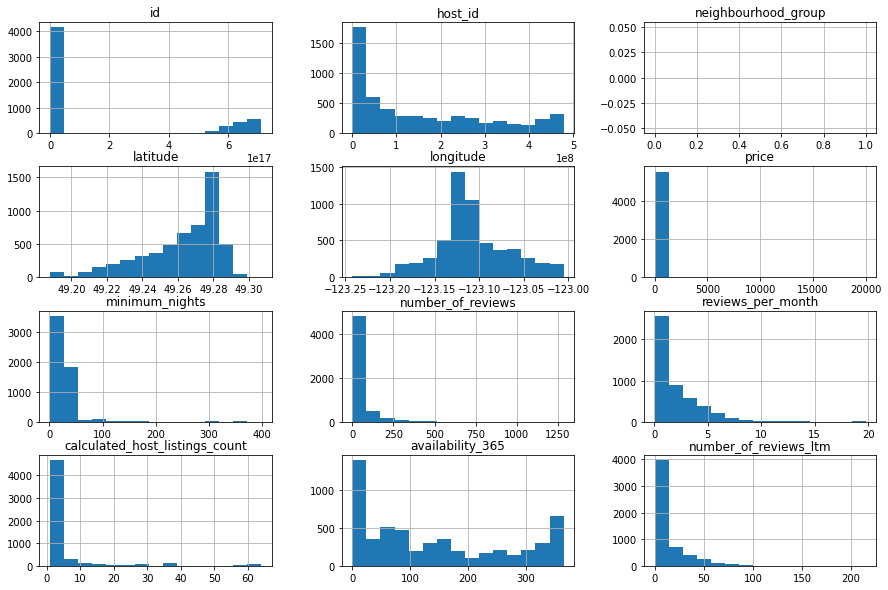

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
df['price'].mean()

233.4032663316583

### **Q4. Qual a correlação existente entre as variáveis**

In [28]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,availability_365
price,1.000000,-0.016240,0.085477
minimum_nights,-0.016240,1.000000,0.111445
availability_365,0.085477,0.111445,1.000000


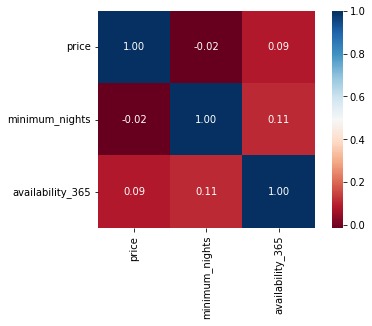

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr,cmap='RdBu',fmt='.2f',square=True,linecolor='white',annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    4541
Private room       1004
Shared room          21
Hotel room            6
Name: room_type, dtype: int64

In [37]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.814968
Private room       0.180187
Shared room        0.003769
Hotel room         0.001077
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [41]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
West Point Grey      702.065217
Arbutus Ridge        400.602941
Kitsilano            300.851485
Downtown             267.489768
Dunbar Southlands    252.515625
Kerrisdale           224.349206
West End             220.379070
Fairview             217.191781
Downtown Eastside    216.300000
Mount Pleasant       212.659443
Name: price, dtype: float64

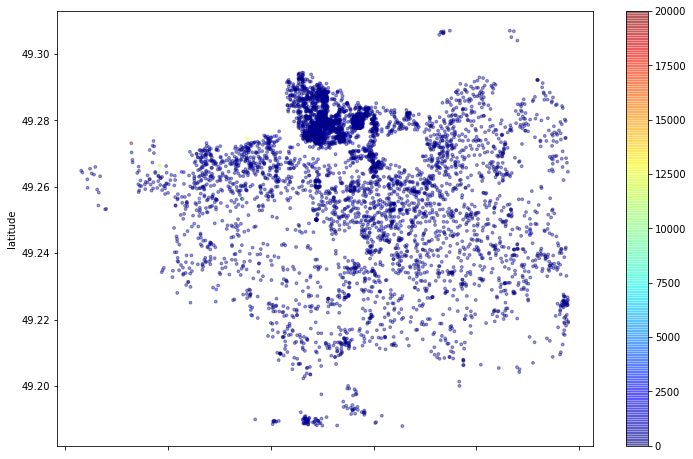

In [42]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4,c=df['price'],s=8,
        cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [43]:
# ver a média da coluna `minimum_nights
df['minimum_nights'].mean()

16.684314429289305

## Conclusões


Foi realizada uma análise básica dos dados de hospedagens em Vancouver pelo Airbnb.
Base de dados com 5572 dados de entrada (linhas) e 18 variáveis (colunas).

*   Variáveis analisadas:'id', 'name', 'host_id', 'host_name' 'neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review' 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object'.
*   Colunas com mais valores ausentes: neighbourhood_group.
*   Média de preços é de 233,40.
*   81% dos imóveis disponíveis são do tipo "Entire home/apt".
*   Localidade mais cara é em "West Point Grey".
*   Mínimo de noites por aluguel é de 16.








